# Import des données

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Lire le fichier Excel
df = pd.read_excel('https://ciqual.anses.fr/cms/sites/default/files/inline-files/Table%20Ciqual%202020_FR_2020%2007%2007.xls')

# Afficher les premières lignes du dataframe
print(df.head())
df2 = df.loc[:,"Energie, Règlement UE N° 1169/2011 (kcal/100 g)"]
df2.head()

   alim_grp_code  alim_ssgrp_code  alim_ssssgrp_code  \
0              0                0                  0   
1              1              101                  0   
2              1              101                  0   
3              1              101                  0   
4              1              101                  0   

             alim_grp_nom_fr              alim_ssgrp_nom_fr  \
0                        NaN                            NaN   
1  entrées et plats composés  salades composées et crudités   
2  entrées et plats composés  salades composées et crudités   
3  entrées et plats composés  salades composées et crudités   
4  entrées et plats composés  salades composées et crudités   

  alim_ssssgrp_nom_fr  alim_code  \
0                 NaN      24999   
1                   -      25601   
2                   -      25602   
3                   -      25605   
4                   -      25606   

                                         alim_nom_fr alim_nom_sci  

0    NaN
1      -
2      -
3      -
4      -
Name: Energie, Règlement UE N° 1169/2011 (kcal/100 g), dtype: object

In [3]:
df['alim_grp_nom_fr'].unique()


array([nan, 'entrées et plats composés',
       'fruits, légumes, légumineuses et oléagineux',
       'produits céréaliers', 'viandes, œufs, poissons et assimilés',
       'produits laitiers et assimilés', 'eaux et autres boissons',
       'produits sucrés', 'glaces et sorbets', 'matières grasses',
       'aides culinaires et ingrédients divers', 'aliments infantiles'],
      dtype=object)

In [26]:
counts = df['alim_grp_nom_fr'].str.title().value_counts()
print(counts)

alim_grp_nom_fr
Viandes, Œufs, Poissons Et Assimilés           788
Fruits, Légumes, Légumineuses Et Oléagineux    614
Entrées Et Plats Composés                      337
Produits Sucrés                                306
Produits Laitiers Et Assimilés                 301
Eaux Et Autres Boissons                        295
Aides Culinaires Et Ingrédients Divers         212
Produits Céréaliers                            145
Matières Grasses                                75
Aliments Infantiles                             39
Glaces Et Sorbets                               29
Name: count, dtype: int64


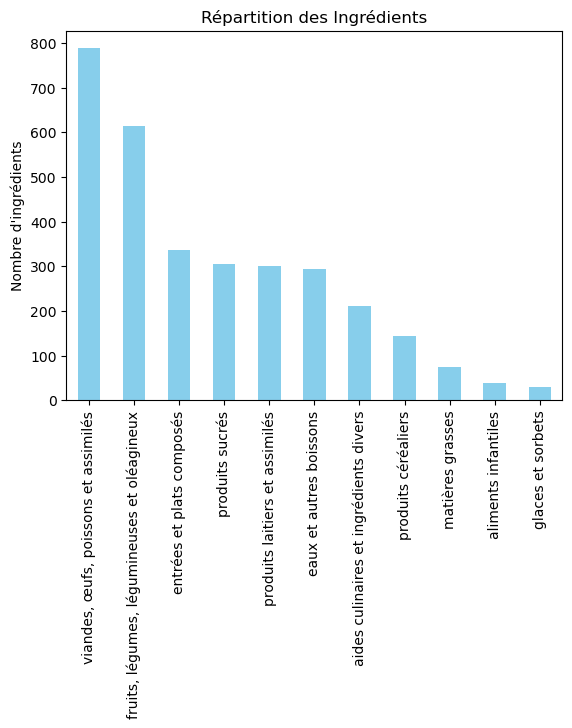

In [10]:
#Barplot
counts.plot(kind='bar', color='skyblue')
plt.title("Répartition des Ingrédients")
plt.xlabel("")
plt.ylabel("Nombre d'ingrédients")
plt.show()

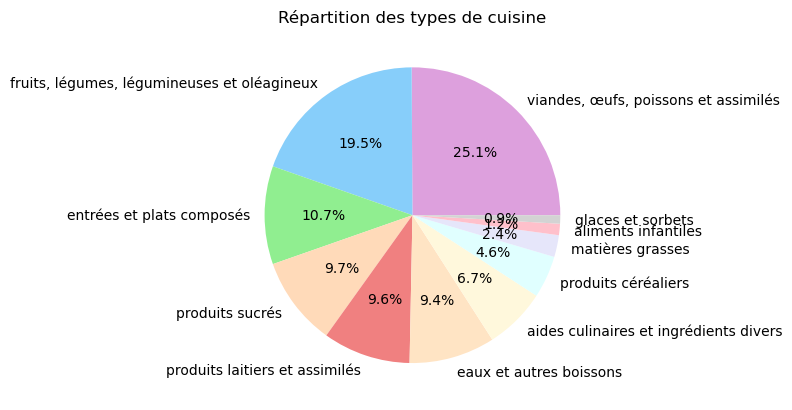

In [16]:
#Pie chart
counts.plot(kind='pie', autopct='%1.1f%%', colors=['plum', 'lightskyblue', 'lightgreen','peachpuff','lightcoral','bisque','cornsilk','lightcyan','lavender','pink','lightgrey'])
plt.title("Répartition des types de cuisine")
plt.ylabel('')  # Cache l'étiquette de l'axe Y
plt.show()

/tmp/ipykernel_94129/814904750.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='category', y='calories', data=dfa, palette='viridis')


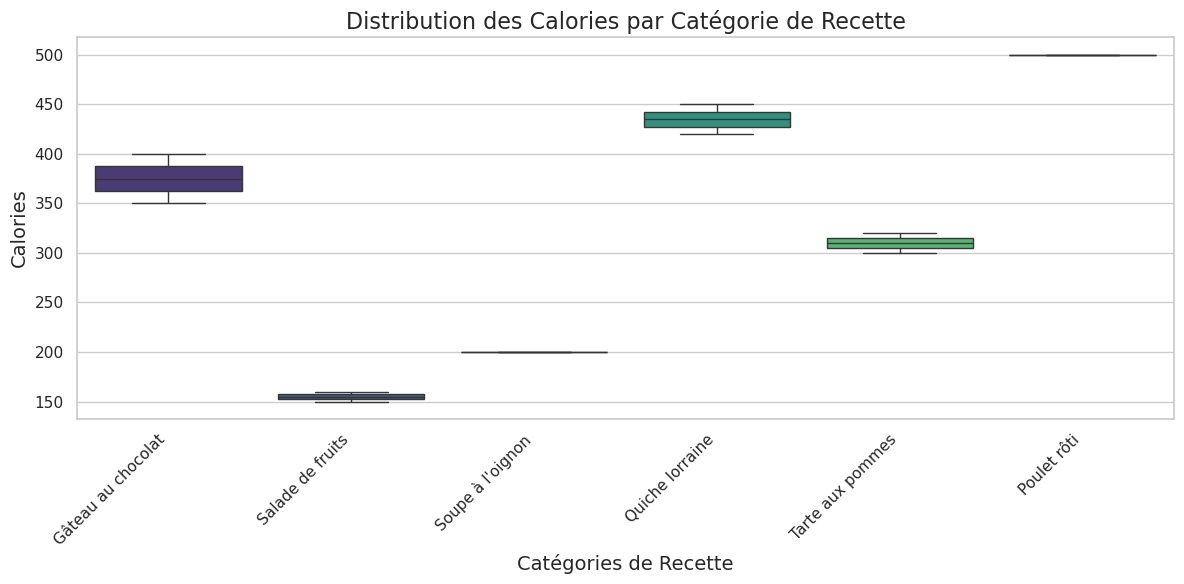

In [48]:
# Exemple de DataFrame
data = {
    'category': ['Gâteau au chocolat', 'Salade de fruits', 'Soupe à l\'oignon', 
                 'Quiche lorraine', 'Tarte aux pommes', 'Poulet rôti', 
                 'Tarte aux pommes', 'Gâteau au chocolat', 'Quiche lorraine', 
                 'Salade de fruits'],
    'calories': [350, 150, 200, 450, 300, 500, 320, 400, 420, 160]
}

dfa = pd.DataFrame(data)
# Tracer le boxplot
plt.figure(figsize=(12, 6))  # Ajuster la taille du graphique pour une bonne lisibilité
sns.boxplot(x='category', y='calories', data=dfa, palette='viridis')

# Soigner la présentation du graphique
plt.title('Distribution des Calories par Catégorie de Recette', fontsize=16)
plt.xlabel('Catégories de Recette', fontsize=14)
plt.ylabel('Calories', fontsize=14)

# Faire pivoter les noms des catégories pour éviter les chevauchements
plt.xticks(rotation=45, ha='right')

# Ajuster le layout pour une meilleure présentation
plt.tight_layout()
plt.show()

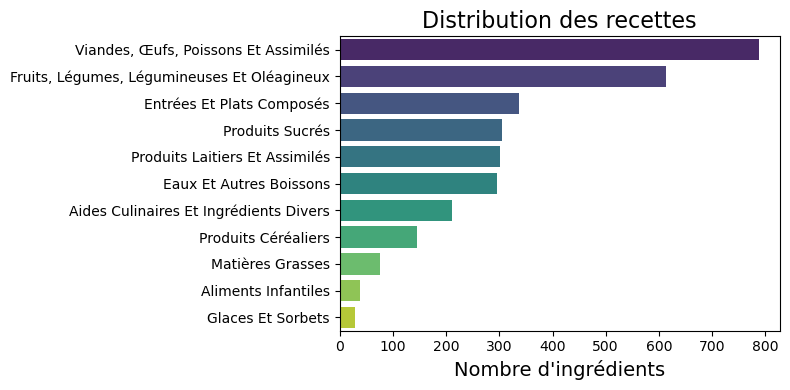

In [30]:
#Barplot2
# Comptage des fréquences de la variable qualitative
frequence = df['alim_grp_nom_fr'].str.title().value_counts()

# Créer un barplot en utilisant seaborn
plt.figure(figsize=(8,4))
sns.barplot(x=frequence.values, y=frequence.index, palette='viridis',hue=frequence.index, legend = False)

# Ajouter les labels et un titre
plt.title("Distribution des recettes", fontsize=16)
plt.xlabel("Nombre d'ingrédients", fontsize=14)
plt.ylabel("", fontsize=14)

# Rotation des étiquettes si nécessaire, ajustement pour les longues catégories
plt.tight_layout()

# Afficher le plot
plt.show()

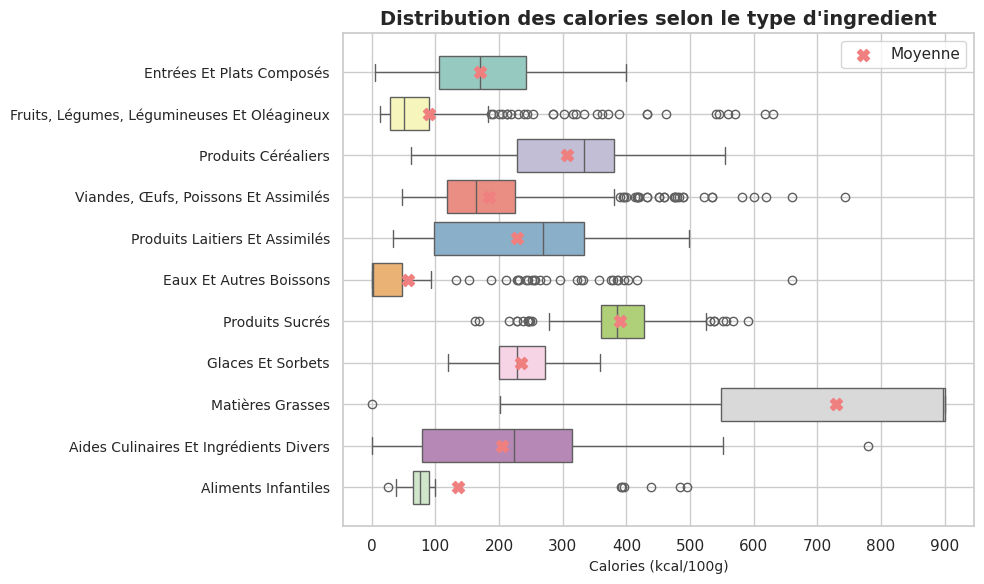

In [97]:
#Boxplots
from matplotlib.ticker import MaxNLocator
df_calories = df.loc[:,["alim_grp_nom_fr","Energie, Règlement UE N° 1169/2011 (kcal/100 g)"]]
df_calories = df_calories.dropna()
df_calories = df_calories[df_calories['Energie, Règlement UE N° 1169/2011 (kcal/100 g)'] != '-']
# Remplacer les virgules par des points
df_calories['Energie, Règlement UE N° 1169/2011 (kcal/100 g)'] = df_calories['Energie, Règlement UE N° 1169/2011 (kcal/100 g)'].str.replace(',', '.', regex=False)  # Convertir les virgules en points
# Convertir la colonne 'Prix' en type numérique
df_calories['Energie, Règlement UE N° 1169/2011 (kcal/100 g)'] = pd.to_numeric(df_calories['Energie, Règlement UE N° 1169/2011 (kcal/100 g)'])
df_calories['alim_grp_nom_fr'] = df_calories['alim_grp_nom_fr'].str.title()

# Initialiser le style de Seaborn 
sns.set(style="whitegrid")

# Créer un graphique boxplot
plt.figure(figsize=(10, 6))  # Ajuster la taille du graphique

# Tracer le boxplot
ax = sns.boxplot(y='alim_grp_nom_fr', x='Energie, Règlement UE N° 1169/2011 (kcal/100 g)', data=df_calories, palette="Set3", hue = 'alim_grp_nom_fr', legend = False)

# Calculer les moyennes par catégorie
mean_values = df_calories.groupby('alim_grp_nom_fr')['Energie, Règlement UE N° 1169/2011 (kcal/100 g)'].mean().reset_index()

# Ajouter des croix pour les moyennes
ax.scatter(mean_values['Energie, Règlement UE N° 1169/2011 (kcal/100 g)'], mean_values['alim_grp_nom_fr'], 
           color='lightcoral', marker='X', s=75, label='Moyenne', zorder = 3)

# Ajouter des étiquettes et un titre
plt.title("Distribution des calories selon le type d'ingredient", fontsize=14,fontweight='bold')

plt.xlabel('Calories (kcal/100g)', fontsize=10)
plt.ylabel('')
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=10))

# Faire pivoter les étiquettes de l'axe des x si nécessaire
plt.yticks(rotation=0, ha='right', fontsize = 10)
plt.grid(True)
plt.legend()
# Ajuster l'affichage pour éviter les chevauchements
plt.tight_layout()

# Afficher le graphique
plt.show()